# Support Vector Machine (SVM)

## Importación de librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importación del dataset

In [2]:
dataset = pd.read_csv('./Datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values # Variables independientes
y = dataset.iloc[:, -1].values # Variable dependiente (la que queremos predecir)

In [4]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## División de los datos en conjunto de entrenamiento y prueba

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) # Dividimos el dataset en entrenamiento y test (75% y 25% respectivamente)

## Escalado de variables

In [6]:
from sklearn.preprocessing import StandardScaler # Importamos la librería para escalar las variables independientes
sc = StandardScaler() # Creamos el objeto para escalar las variables
X_train = sc.fit_transform(X_train) # Escalamos las variables de entrenamiento
X_test = sc.transform(X_test) # Escalamos las variables de test

## Entrenamiento del modelo SVM en el conjunto de entrenamiento

In [7]:
# clase de sklearn.svm.SVC 
from sklearn.svm import SVC # Importar la clase DecisionTreeClassifier
classifier = SVC(kernel = 'linear', random_state = 0)# creamos el objeto svc con karnel lineal
classifier.fit(X_train, y_train) # Entrene el modelo de clasificación de árbol de decisión en el conjunto de entrenamiento.

SVC(kernel='linear', random_state=0)

## Prediciendo un nuevo valor

In [8]:
print(classifier.predict(sc.transform([[30,87000]]))) # prediciendo un nuevo valor con el modelo entrenado (30 años y 87000 de salario)

[0]


## Predicción de los resultados con el conjunto de prueba

In [11]:
y_pred = classifier.predict(X_test) # predicciones de los datos de prueba X_test con el modelo entrenado
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) # concatenamos los vectores y_pred y y_test en un solo vector para compararlos

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


## Matriz de confusión

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[66  2]
 [ 8 24]]


0.9

## Visualización de los resultados en el Conjunto de Entrenamiento

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()

## Visualización de los resultados en el conjunto de prueba

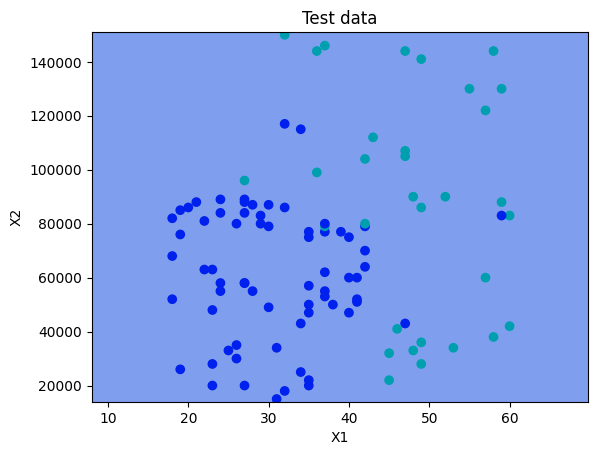

In [ ]:
#invertir a los valores originales y visualizar los resultados del test en un grafico con la linea de separacion.

X_test, y_test = sc.inverse_transform(X_test), y_test
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='winter') # c es y_test para que los puntos sean del color de la clase a la que pertenecen (0 o 1) y cmap es el color del mapa de colores
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.5, cmap='winter') # grafico de la linea de separacion de los puntos de test
plt.title('Test data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25), # creamos una malla de puntos para graficar el clasificador 
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25)) # creamos una malla de puntos para graficar el clasificador 
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green'))) # graficamos el clasificador 
plt.xlim(X1.min(), X1.max()) # limites de la grafica 
plt.ylim(X2.min(), X2.max()) # limites de la grafica
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j) # graficamos los puntos 
plt.title('SVM (Test set)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()

MemoryError: Unable to allocate 139. GiB for an array with shape (18625100832,) and data type float64

: 